In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('AI_Human.csv')
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [37]:
X = df['text']
y = df['generated']
print(X[0])

Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.

In like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, "

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
clf = RandomForestClassifier(n_estimators=200, min_samples_leaf=100, class_weight='balanced')
vectorizer = TfidfVectorizer(stop_words="english")

In [17]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
model = Pipeline([
    ('vectorizer', vectorizer),
    ('oversampling', SMOTE()),
    ('classifier', clf)
])

model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(stop_words='english')),
                ('oversampling', SMOTE()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=100,
                                        n_estimators=200))])

In [24]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_train)
print("Training\n", classification_report(y_train, y_pred))

Training
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97    213828
         1.0       0.96      0.94      0.95    127236

    accuracy                           0.96    341064
   macro avg       0.96      0.96      0.96    341064
weighted avg       0.96      0.96      0.96    341064



In [25]:
y_pred_test = model.predict(X_test)
print("Testing\n", classification_report(y_test, y_pred_test))

Testing
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     91969
         1.0       0.96      0.93      0.95     54202

    accuracy                           0.96    146171
   macro avg       0.96      0.96      0.96    146171
weighted avg       0.96      0.96      0.96    146171



In [27]:
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']

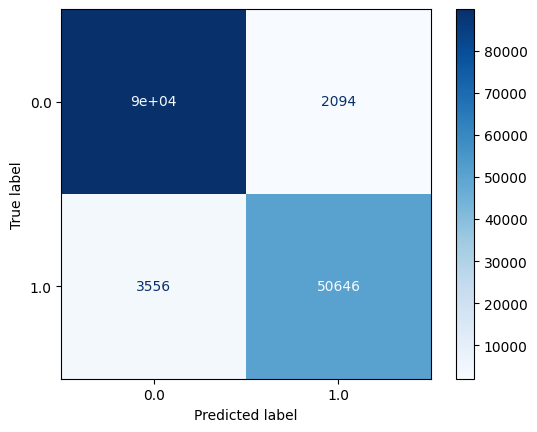

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')


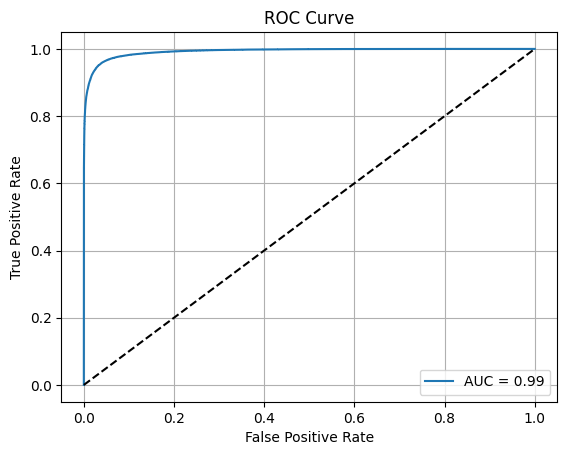

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
print(model.predict_proba(['''
As someone who's always been passionate about the environment, I’ve found the shift toward renewable energy both exciting and hopeful. Growing up, I remember hearing about how fossil fuels were damaging the planet, but it felt like such a distant issue. Now, seeing solar panels on rooftops and wind turbines on the horizon feels like real progress. I believe renewable energy isn’t just a technological upgrade — it’s a statement about the kind of world we want to live in. There’s still a long way to go, especially when it comes to making clean energy accessible to everyone, but I’m optimistic. If we keep pushing forward, we might actually leave a healthier planet for the next generation.
                           ''']))

[[0.26967152 0.73032848]]
